<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network

Creator: Bereczki Zoltán

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, Conv2D, BatchNormalization, Activation, GlobalMaxPool2D
from sklearn.metrics import RocCurveDisplay, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from random import randint
import cv2
import io
import os

In [ ]:
!pip install extra-keras-datasets
from extra_keras_datasets import svhn

# 1. Load the Street View House Numbers (SVHN) dataset
- Download the SVHN database and load the train and test datasets! There are multiple ways to do this. The easiest one is probably to install and use the extra-keras-datasets Python package. You need to use the standard/normal SVHN dataset only and NOT the one titled as extra! (Of course, if you have enough RAM and VRAM, you can work with that one too, if you want...)
- Preprocess the downloaded data if needed to be able to use it for training and testing!
- Normalize the pixel values into the interval of [0,1]!
- How many and what classes do we have in the dataset? How many train and test examples do we have?
- What are the dimensions of the images?
- Show some images randomly from the dataset!
- Make one-hot encoding for the labels!

In [ ]:
# Download SVHN database
(x_train, y_train), (x_test, y_test) = svhn.load_data(type='normal')

INFO:root:Loading dataset = svhn


64290816/64275384 [==============================] - 5s 0us/step


In [ ]:
# See dimensions of data sets
print('X_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (73257, 32, 32, 3)
y_train shape:  (73257,)
X_test shape:  (26032, 32, 32, 3)
y_test shape:  (26032,)


The images' dimension 32x32, because there are 32 pixels in both direction (horizontal, vertical) on the images. 
There are 73257 examples in training set whereas 26032 in test set.

In [ ]:
# Check classes
labels = np.array(sorted(np.unique(y_test)))
labels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

There are 10 classes (1-10) in svhn dataset where '10' means '0'.

In [ ]:
# Function that displays some images randomly if the desired number of images is dividable by 5

def image_show(data, n):
  fig = plt.figure()
  for i in range(n):
    # add subplot
    fig.add_subplot(n/5, 5, i+1)
    # get random x_train index values
    idx = randint(0, data.shape[0])
    # display it
    plt.imshow(data[idx])
    plt.axis('off')
  return 0

0

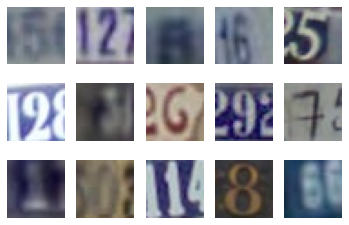

In [ ]:
image_show(x_train, 15)

In [ ]:
# Preprocces data

# Normalize
# 1st method: by dividing with maximum value which is 255 at the case of image data
x_train = x_train/255
x_test = x_test/255


# 2nd method: by using keras built-in normalize function
#x_train = keras.utils.normalize(x_train)
#x_test = keras.utils.normalize(x_test)

print('x_train: ', x_train[0])
print('\nx_test: ', x_test[0])

x_train:  [[[0.12941176 0.11764706 0.14901961]
  [0.05882353 0.09019608 0.0745098 ]
  [0.05882353 0.06666667 0.0745098 ]
  ...
  [0.28235294 0.25490196 0.21960784]
  [0.32156863 0.30196078 0.22352941]
  [0.34901961 0.30980392 0.23137255]]

 [[0.10980392 0.15294118 0.1372549 ]
  [0.05490196 0.09803922 0.08627451]
  [0.05490196 0.07843137 0.06666667]
  ...
  [0.15686275 0.15294118 0.19607843]
  [0.2627451  0.22745098 0.20392157]
  [0.3254902  0.30588235 0.23529412]]

 [[0.15686275 0.16078431 0.14901961]
  [0.07058824 0.08235294 0.10196078]
  [0.0627451  0.06666667 0.09019608]
  ...
  [0.09019608 0.11372549 0.17647059]
  [0.1372549  0.16470588 0.17254902]
  [0.28235294 0.27058824 0.20784314]]

 ...

 [[0.3372549  0.31764706 0.29411765]
  [0.34117647 0.32156863 0.27843137]
  [0.32156863 0.30980392 0.25490196]
  ...
  [0.40784314 0.40784314 0.34117647]
  [0.40784314 0.41176471 0.31764706]
  [0.40392157 0.41176471 0.30588235]]

 [[0.32941176 0.3372549  0.25098039]
  [0.3372549  0.30980392 0.

In [ ]:
# Convert 10 to 0 for one-hot enocoding
y_train = np.where(y_train==10, 0, y_train)
y_test = np.where(y_test==10, 0, y_test)

In [ ]:
# One-hot encoding
y_train_oh = keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Check one-hot encoding
print('Original y_train: ', y_train[:5])
print('Converted y_train: ', y_train_oh[:5])
print('Original y_test: ', y_test[:5])
print('Converted y_test: ', y_test_oh[:5])

Original y_train:  [1 9 2 3 2]
Converted y_train:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Original y_test:  [5 2 1 0 6]
Converted y_test:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# 2. Create a convolutional neural network for the SVHN dataset
- Train the following network on the training set and generate prediction for the test images:

      > conv2D, 16 kernels, kernel size = (3,3), valid padding, relu actvation
      > conv2D, 16 kernels, kernel size = (3,3), valid padding, relu actvation
      > maxpooling kernel size = (2,2)
      > conv2D, 32 kernels, kernel size = (3,3), valid padding, relu actvation
      > conv2D, 32 kernels, kernel size = (3,3), valid padding, relu actvation
      > maxpooling pool size = (2,2) strides = (2,2)
      > flatten
      > dense, 10 neurons, softmax activation
- Use Adam optimizer with default parameters
- Use categorical crossentropy as loss function
- Compile the model
- Print out a summary of the model
- Train the CNN on the training data for 25 epochs with batch size of 64
- Use the test data as validation data
- Calculate the categorical cross-entropy loss and the accuracy! [HINT]: you should get at least $\approx$ 80-90% accuracy.

- Plot the training and the validation loss and accuracy on the same plot! Do we experience overfitting?
Show the confusion matrix of the predictions!

In [ ]:
# Build convolutional neural network's architecture

cnv_model = Sequential()
cnv_model.add(Conv2D(16, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=x_train.shape[1:]))
cnv_model.add(Conv2D(16, kernel_size=(3, 3), padding='valid', activation='relu'))
cnv_model.add(MaxPooling2D(pool_size=(2, 2)))

cnv_model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
cnv_model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
cnv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnv_model.add(Flatten())
cnv_model.add(Dense(10, activation='softmax'))

# Print model summary
print(cnv_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

In [ ]:
cnv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
cnv_model_history = cnv_model.fit(x=x_train, y=y_train_oh, batch_size=64, epochs=25, validation_data=(x_test, y_test_oh))

Epoch 1/25
1145/1145 [==============================] - 13s 11ms/step - loss: 0.4523 - accuracy: 0.8687 - val_loss: 0.4822 - val_accuracy: 0.8606
Epoch 2/25
1145/1145 [==============================] - 13s 11ms/step - loss: 0.4073 - accuracy: 0.8823 - val_loss: 0.5035 - val_accuracy: 0.8528
Epoch 3/25
1145/1145 [==============================] - 14s 12ms/step - loss: 0.3813 - accuracy: 0.8898 - val_loss: 0.4414 - val_accuracy: 0.8720
Epoch 4/25
1145/1145 [==============================] - 13s 12ms/step - loss: 0.3587 - accuracy: 0.8945 - val_loss: 0.4356 - val_accuracy: 0.8738
Epoch 5/25
1145/1145 [==============================] - 13s 12ms/step - loss: 0.3421 - accuracy: 0.9003 - val_loss: 0.4203 - val_accuracy: 0.8780
Epoch 6/25
1145/1145 [==============================] - 13s 12ms/step - loss: 0.3307 - accuracy: 0.9035 - val_loss: 0.4010 - val_accuracy: 0.8854
Epoch 7/25
1145/1145 [==============================] - 13s 12ms/step - loss: 0.3163 - accuracy: 0.9076 - val_loss: 0.4025 -

In [ ]:
# Predict the labels of test set
y_pred = cnv_model.predict(x_test)

# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec = np.array([i.argmax() for i in y_pred])

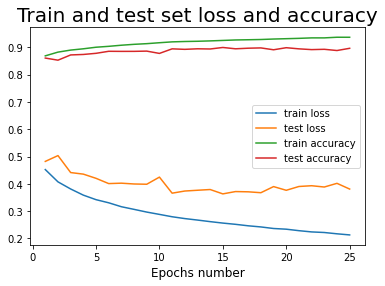

In [ ]:
# Plot accuracy and loss on the same plot

train_loss = cnv_model_history.history['loss']
val_loss = cnv_model_history.history['val_loss']
cnv_model_acc = cnv_model_history.history['accuracy'] 
cnv_model_acc_test = cnv_model_history.history['val_accuracy']

epochs = range(1, 26)
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.plot(epochs, cnv_model_acc, label='train accuracy')
plt.plot(epochs, cnv_model_acc_test, label='test accuracy')
plt.title('Train and test set loss and accuracy', fontsize=20)
plt.xlabel('Epochs number', fontsize=12)
plt.legend()


I think, this model doesn't overfit the data, because both loss decreasing while the accuracy for both sets increasing. Of course the accuracy of test set is below train set accuracy.

In [ ]:
# Confusion matrix
cnf_mtx = confusion_matrix(y_true=y_test, y_pred=y_pred_dec)
cnf_mtx

array([[1534,   27,   29,    5,    3,    7,   62,    7,   31,   39],
       [  51, 4746,   56,   24,   63,   31,   23,   77,   17,   11],
       [   2,   40, 3882,   70,   28,   24,   22,   45,   16,   20],
       [   8,   49,   97, 2447,   14,   92,   19,   17,   57,   82],
       [  13,   83,   39,   28, 2281,   16,   20,   10,   14,   19],
       [   6,   13,   19,   75,   10, 2175,   54,    5,   12,   15],
       [  19,   27,   21,   37,   16,   61, 1730,    5,   49,   12],
       [   3,   99,   48,   24,    4,   19,    2, 1811,    1,    8],
       [  16,   15,   26,   60,   11,   42,  102,    2, 1351,   35],
       [  39,   21,   60,   22,    7,   27,   14,    8,   21, 1376]])

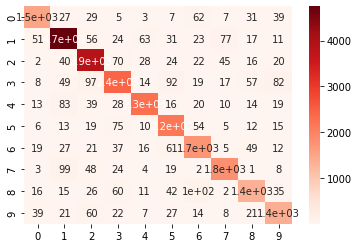

In [ ]:
# Display it with seaborn
sns.heatmap(pd.DataFrame(cnf_mtx), annot=True, cmap='Reds')

# 3. Load the Sload Digital Sky Survey (SDSS) Dataset

You can download the dataset from Kaggle via this link.

- Download the images from Kaggle (~10'000 images total)
- Preprocess the images similarly to the SVHN dataset if needed! (Normalize pixel values to [0,1], etc.)
- What are the dimensions of the images?
- Show 15 images randomly from the dataset!
- Create a train-test-validation split using train_test_split from sklearn where the test size is $0.33$ and the validation size is $0.2$
-  Set a random seed
-  Print the number of images in each of these sets after you've created them



In [ ]:
# Upload dataframe
from google.colab import files

uploaded = files.upload()

Saving skyserver_photoZ_data_DR16.csv to skyserver_photoZ_data_DR16.csv


In [ ]:
# Open the dataframe
sky_redshift_df = pd.read_csv(io.BytesIO(uploaded['skyserver_photoZ_data_DR16.csv']))
sky_redshift_df

,specObjID,ra,dec,z
0,5457255364792963072,179.94568,5.601128,0.611592
1,5457264435763892224,179.87307,5.536654,0.519419
2,947020949721475072,179.87175,5.579883,0.129071
3,5457264985519706112,179.70930,5.616096,0.632514
4,5457265260397613056,179.68102,5.596931,0.682077
...,...,...,...,...
9842,5344779168881332224,179.11661,3.805388,0.519190
9843,5344779718637146112,179.09454,3.816496,0.516736
9844,946960751459854336,178.98641,3.719327,0.080494
9845,579994891963099136,179.00126,3.721930,0.080491


In [ ]:
# Mount my google drive where I uploaded the images in the image directory
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Place the images one by one into a list and also their names into another list
basepath = '/gdrive/MyDrive/Images/'
image_arr_list, filenames_list = [], []
cntr = 1
for file_name in os.listdir(basepath):
  filenames_list.append(file_name)
  image_arr_list.append(cv2.imread(basepath + file_name))
  print(cntr)
  cntr += 1
  

Streaming output truncated to the last 5000 lines.
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037

In [ ]:
# Save the pixel data of images
import pickle

#infile_path = "/content/image_arr_list"
#infile = open(infile_path, 'wb')
#pickle.dump(image_arr_list, infile)
#infile.close


#infile_path = "/content/filename_list"
#infile = open(infile_path, 'wb')
#pickle.dump(filenames_list, infile)
#infile.close

# Upload pickle objects then open them
#for i in range(2):
#  uploaded = files.upload()

infile = open('/content/image_array_list', 'rb')
image_arr_list = pickle.load(infile)
infile.close()

infile = open('/content/filename_list', 'rb')
filenames_list = pickle.load(infile)
infile.close()

In [ ]:
# Convert the list into an array
image_array = np.array(image_arr_list)

In [ ]:
# Images' dimensions
image_array.shape

(9847, 96, 96, 3)

These images have 96x96x3 dimensions which is proved by the sentence in there (kaggle) where the images came from: "96x96x3 shaped cutouts from the SDSS images in jpg format."

0

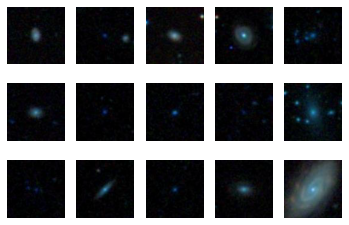

In [ ]:
# Plot 15 images randomly
image_show(image_array, 15)

In [ ]:
# Normalize data
image_array_norm = image_array/255

image_array_norm[:2]

array([[[[0.        , 0.00392157, 0.0627451 ],
         [0.        , 0.02745098, 0.09803922],
         [0.        , 0.05098039, 0.15294118],
         ...,
         [0.01960784, 0.01568627, 0.02352941],
         [0.00392157, 0.        , 0.00784314],
         [0.        , 0.        , 0.00392157]],

        [[0.        , 0.00392157, 0.04705882],
         [0.        , 0.02745098, 0.08235294],
         [0.        , 0.0627451 , 0.14117647],
         ...,
         [0.02352941, 0.01960784, 0.02745098],
         [0.01176471, 0.00784314, 0.01568627],
         [0.        , 0.        , 0.00392157]],

        [[0.        , 0.00392157, 0.02352941],
         [0.        , 0.02352941, 0.05882353],
         [0.        , 0.04705882, 0.10980392],
         ...,
         [0.02352941, 0.01960784, 0.02745098],
         [0.01568627, 0.01176471, 0.01960784],
         [0.01176471, 0.00784314, 0.01568627]],

        ...,

        [[0.01568627, 0.01568627, 0.01568627],
         [0.01176471, 0.01176471, 0.01176471]

In [ ]:
# Extract labels (redshift) from dataframe
y = sky_redshift_df['z']

# Check the order is the same or not with order of images by using the names list
print(y[:5])
print(filenames_list[:5])

0    0.611592
1    0.519419
2    0.129071
3    0.632514
4    0.682077
Name: z, dtype: float64
['08837_id9.457823498560082e+17_z0.07549676.png', '08841_id5.364971700294537e+18_z0.4530198.png', '08849_id5.799407410154312e+17_z0.08113092.png', '08861_id5.364985169311977e+18_z0.3390141.png', '08853_id5.364993415649186e+18_z0.315365.png']


The order is not same between the images in the array and the z values in dataframe.

In [ ]:
# Order the z values (y) as the same as images and filenames in the list and in the array
y = []
# Loop through filenames in the list (filenames' order is the same as images' order in image_array)
for filename in filenames_list:
  # if the id is 00000 then select the redshift value in the first row of dataframe
  if filename.startswith('00000'):
    #print(filename)
    #print('id: {}'.format(id))
    # extract corresponding redshift value from dataset
    redshift_val = sky_redshift_df.iloc[0, 3]
  else:
    id = int(filename[:5].lstrip('0'))
    #print(id)
    redshift_val = sky_redshift_df.iloc[id, 3]
  y.append(redshift_val)

y = np.array(y)
y = y.reshape(9847, 1)

In [ ]:
# Check the orders now again
print(y[:5])
print(filenames_list[:5])

[[0.07549676]
 [0.4530198 ]
 [0.08113092]
 [0.3390141 ]
 [0.315365  ]]
['08837_id9.457823498560082e+17_z0.07549676.png', '08841_id5.364971700294537e+18_z0.4530198.png', '08849_id5.799407410154312e+17_z0.08113092.png', '08861_id5.364985169311977e+18_z0.3390141.png', '08853_id5.364993415649186e+18_z0.315365.png']


The orders of images and redshifts values is good now.

In [ ]:
# Split data and label
x_train, x_test, y_train, y_test = train_test_split(image_array_norm, y, test_size=0.33, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

print('x_train: {}\ty_train: {}'.format(x_train.shape[0], len(y_train)))
print('x_test: {}\ty_test: {}'.format(x_test.shape[0], len(y_test)))
print('x_val: {}\ty_val: {}'.format(x_val.shape[0], len(y_val)))

x_train: 5277	y_train: 5277
x_test: 3250	y_test: 3250
x_val: 1320	y_val: 1320


# 4. Create a convolutional neural network for the SDSS dataset
Train the following network on the training set and generate prediction for the test images:

      > conv2D, 32 kernels, kernel size = (3,3), same padding
      > batch normalization
      > relu actvation
      > conv2D, 32 kernels, kernel size = (3,3), same padding
      > batch normalization
      > relu actvation
      > maxpooling pool size = (2,2), strides = (2,2)

      > conv2D, 64 kernels, kernel size = (3,3), same padding
      > batch normalization
      > relu actvation
      > conv2D, 64 kernels, kernel size = (1,1), same padding
      > batch normalization
      > relu actvation
      > conv2D, 64 kernels, kernel size = (3,3), same padding
      > batch normalization
      > relu actvation
      > maxpooling pool size = (2,2), strides = (2,2)

      > global pooling
      > dense, 1 neuron, no activation
- Use Adam optimizer with default parameters
- Use mean squared error as loss function
- Compile the model
- Print out a summary of the model
- Use the created validation set as validation during the training
- Train the CNN on the training data for 25 epochs with batch size of 64
- Calculate and print out the final accuracy using the R2 score!

In [ ]:
# Build convolutional neural network's architecture

cnv_model = Sequential()
cnv_model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=x_train.shape[1:]))
cnv_model.add(BatchNormalization())
cnv_model.add(Activation('relu'))
cnv_model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
cnv_model.add(BatchNormalization())
cnv_model.add(Activation('relu'))
cnv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnv_model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
cnv_model.add(BatchNormalization())
cnv_model.add(Activation('relu'))
cnv_model.add(Conv2D(64, kernel_size=(1, 1), padding='same'))
cnv_model.add(BatchNormalization())
cnv_model.add(Activation('relu'))
cnv_model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
cnv_model.add(BatchNormalization())
cnv_model.add(Activation('relu'))
cnv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnv_model.add(GlobalMaxPool2D())
cnv_model.add(Dense(1))

# Print model summary
print(cnv_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 96, 96, 32)        896       
                                                                 
 batch_normalization_22 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 96, 96, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 batch_normalization_23 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 96, 96, 32)       

In [ ]:
cnv_model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.MeanSquaredError()])

In [ ]:
# Fit the model
cnv_model_history = cnv_model.fit(x=x_train, y=y_train, batch_size=64, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25
83/83 [==============================] - 11s 119ms/step - loss: 0.1802 - mean_squared_error: 0.1802 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 2/25
83/83 [==============================] - 9s 112ms/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 3/25
83/83 [==============================] - 10s 120ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 4/25
83/83 [==============================] - 9s 113ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5/25
83/83 [==============================] - 9s 114ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 6/25
83/83 [==============================] - 9s 113ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 7/25
83/83 [========

In [ ]:
# Predict with the model
y_pred = cnv_model.predict(x_test)

# 5. Evaluate performance
- Plot the training and the validation loss on the same plot!
- Show the predicted values vs the actual labels on a plot!
- Where does the model make mistakes? Try to plot the images corresponding to some outlier values!

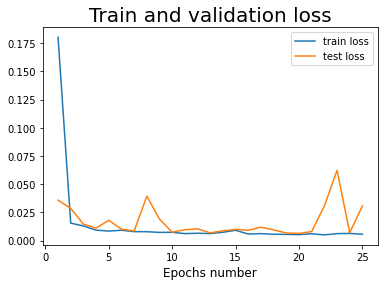

In [ ]:

# Plot accuracy and loss on the same plot

train_loss = cnv_model_history.history['loss']
val_loss = cnv_model_history.history['val_loss']

epochs = range(1, 26)
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.title('Train and validation loss', fontsize=20)
plt.xlabel('Epochs number', fontsize=12)
plt.legend()


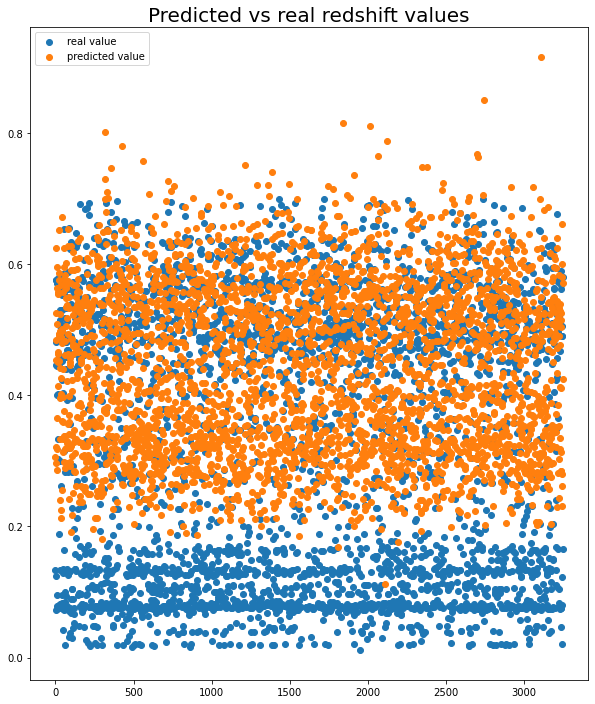

In [ ]:
# PLot predicted and real labels

plt.figure(figsize=(10, 12))
plt.title('Predicted vs real redshift values', fontsize=20)

plt.scatter([i for i in range(len(y_test))], y_test, label='real value')
plt.scatter([i for i in range(len(y_pred))], y_pred, label='predicted value')
plt.legend()


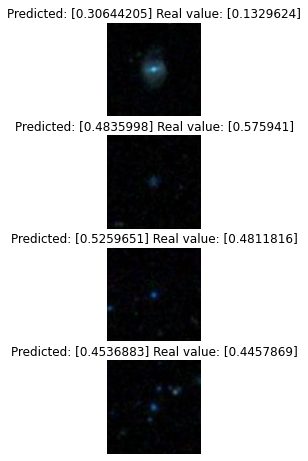

In [ ]:
# Plot wrong predictions

plt.figure(figsize=(15, 10))
dim = 1
# loop through predictions
for id, pred in enumerate(y_pred):
  # Not plot more than 15 cases when the prediction is wrong
  if dim == 5:
    break
  else:
    # if predicted label not the real label then plot it
    if pred != y_test[id]:
      plt.subplot(5, 1, dim)
      plt.title('Predicted: {} Real value: {}'.format(pred, y_test[id]))
      plt.imshow(x_test[id], cmap='gray')
      plt.axis('off')
      dim += 1

